# Hi, In this notebook, We will be extracting raw data from excel which can be downloaded from http://www.screener.in , processing it and then plotting the Sales,Net Profit, Dividend Amount, calculate their CAGR for given period in rolling fashion. Something like a floating hist plot. 

Data Source - https://www.screener.in

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [16, 6]
sns.set(style='darkgrid')

# Let's look at a sample excel and see how our data is, Let's use Hexaware Tech's data file

In [3]:
df = pd.read_excel('Hexaware Tech.xlsx', sheet_name=5)
df = df.drop(list(range(14)), axis=0)
df = df.iloc[0:16]
df = df.set_index('COMPANY NAME').T
df = df.reset_index(drop=True)
df['Report Date'] = df['Report Date'].dt.strftime('%Y')
df['Year'] = df['Report Date'].astype(int)
df = df.set_index('Year')
df.index.names = ['Hexaware Tech']
columns = df.columns
print(columns)

Index(['Report Date', 'Sales', 'Raw Material Cost', 'Change in Inventory',
       'Power and Fuel', 'Other Mfr. Exp', 'Employee Cost',
       'Selling and admin', 'Other Expenses', 'Other Income', 'Depreciation',
       'Interest', 'Profit before tax', 'Tax', 'Net profit',
       'Dividend Amount'],
      dtype='object', name='COMPANY NAME')


In [4]:
df.head(20)

COMPANY NAME,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Dividend Amount
Hexaware Tech,,,,,,,,,,,,,,,,
2008,2008,1151.91,NaN,NaN,11.59,163.55,688.18,149.54,56.61,23.09,28.42,3.16,74.45,15.47,58.98,14.37
2009,2009,1038.56,NaN,NaN,9.62,127.27,571.07,114.64,79.21,37.48,27.09,2.62,144.52,10.34,134.18,20.11
2010,2010,1054.56,NaN,NaN,10.4,160.89,675.48,116.03,67.32,119.15,24.23,3.23,116.13,8.54,107.59,43.56
2011,2011,1450.51,NaN,NaN,14.26,219.64,821.02,122.94,-14.43,48.21,24.7,3.06,307.53,40.5,267.03,117.34
2012,2012,1948.18,NaN,NaN,17.99,318.24,1060.56,132.51,25.2,43.77,32.41,1.13,403.96,76.32,327.65,160.14
2013,2013,2285.35,NaN,NaN,17.2,369.55,1221.88,145.53,49.14,37.27,38.6,1.23,479.5,100.36,379.14,332.89
2014,2014,2581.68,NaN,NaN,17.81,449.11,1459.63,165.24,48.75,16.22,43.97,1.82,418.12,97.97,320.15,284.4
2015,2015,3123.52,NaN,NaN,19.52,599.89,1773.22,172.49,13.45,9.02,48.25,1.11,504.61,111.4,393.21,260.84
2016,2016,3534.9,NaN,NaN,21.37,686.86,1994.39,236.54,18.38,39.43,55.25,1.14,560.4,141.24,419.16,166.13


In [5]:
df.describe()

COMPANY NAME,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Dividend Amount
count,10,10.00,0.0,0.0,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.0
unique,10,10.00,0.0,0.0,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.0
top,2015,1151.91,NaN,NaN,14.26,127.27,1773.22,165.24,79.21,119.15,63.28,1.82,479.5,15.47,379.14,284.4
freq,1,1.00,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0


# We are using the log scale to better visualize the change in rate of growth

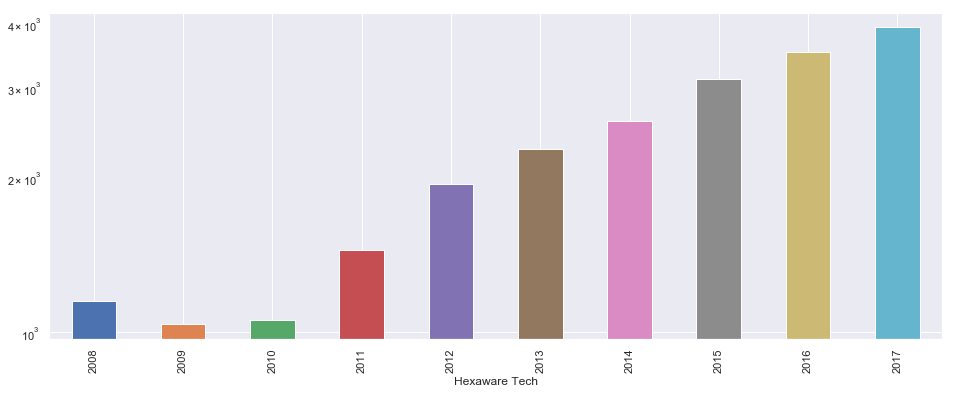

In [6]:
df['Sales'].plot(kind='bar', logy=True)
plt.show()

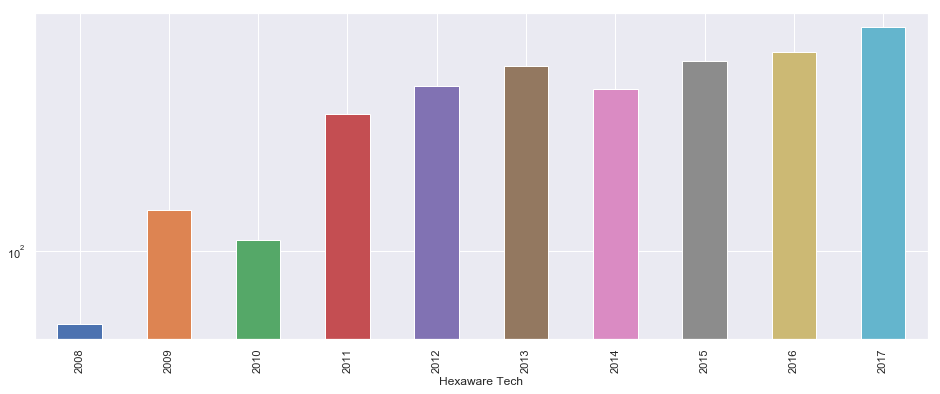

In [7]:
df['Net profit'].plot(kind='bar', logy=True)
plt.show()

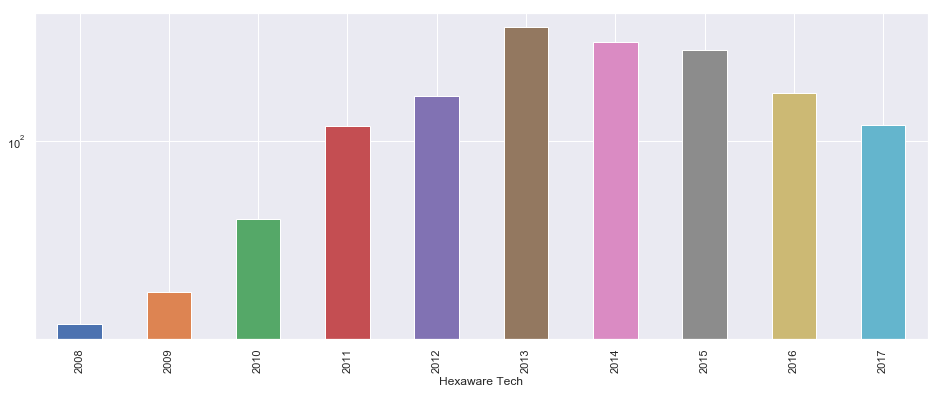

In [8]:
df['Dividend Amount'].plot(kind='bar', logy=True)
plt.show()

In [9]:
import os
import glob
extension = 'xlsx'
companies = [i for i in glob.glob(f'*.{extension}')]

In [10]:
masterdf = []

for company in companies:
    df = pd.read_excel(company, sheet_name=5)
    df = df.drop(list(range(14)), axis=0)
    df = df.iloc[0:16]
    df = df.set_index('COMPANY NAME').T
    df = df.reset_index(drop=True)
    df['Report Date'] = df['Report Date'].dt.strftime('%Y')
    df['Year'] = df['Report Date']
    #df = df.drop(['Report Date'], axis=1)
    df = df.set_index('Year')
    df.index.names = [company.split('.')[0]]
    df['Company'] = company.split('.')[0]
    columns = df.columns
    print(company.split('.')[0])
    masterdf.append(df)

print('Done')

Hexaware Tech
Infosys
Kellton Tech
Mindtree
Tata Elxsi
TCS
Done


In [11]:
merged_df = pd.concat(masterdf)
merged_df.fillna(0, inplace=True)
merged_df.replace({'NaT': np.nan}, inplace=True)
merged_df.dropna(inplace=True)
merged_df['Report Date'] = merged_df["Report Date"].astype(int)
merged_df['Year'] = merged_df['Report Date']
merged_df = merged_df.set_index('Year')

In [12]:
merged_df.head(20)

COMPANY NAME,Report Date,Sales,Raw Material Cost,Change in Inventory,Power and Fuel,Other Mfr. Exp,Employee Cost,Selling and admin,Other Expenses,Other Income,Depreciation,Interest,Profit before tax,Tax,Net profit,Dividend Amount,Company
Year,,,,,,,,,,,,,,,,,
2008,2008,1151.91,0.0,0.0,11.59,163.55,688.18,149.54,56.61,23.09,28.42,3.16,74.45,15.47,58.98,14.37,Hexaware Tech
2009,2009,1038.56,0.0,0.0,9.62,127.27,571.07,114.64,79.21,37.48,27.09,2.62,144.52,10.34,134.18,20.11,Hexaware Tech
2010,2010,1054.56,0.0,0.0,10.40,160.89,675.48,116.03,67.32,119.15,24.23,3.23,116.13,8.54,107.59,43.56,Hexaware Tech
2011,2011,1450.51,0.0,0.0,14.26,219.64,821.02,122.94,-14.43,48.21,24.70,3.06,307.53,40.50,267.03,117.34,Hexaware Tech
2012,2012,1948.18,0.0,0.0,17.99,318.24,1060.56,132.51,25.20,43.77,32.41,1.13,403.96,76.32,327.65,160.14,Hexaware Tech
2013,2013,2285.35,0.0,0.0,17.20,369.55,1221.88,145.53,49.14,37.27,38.60,1.23,479.50,100.36,379.14,332.89,Hexaware Tech
2014,2014,2581.68,0.0,0.0,17.81,449.11,1459.63,165.24,48.75,16.22,43.97,1.82,418.12,97.97,320.15,284.40,Hexaware Tech
2015,2015,3123.52,0.0,0.0,19.52,599.89,1773.22,172.49,13.45,9.02,48.25,1.11,504.61,111.40,393.21,260.84,Hexaware Tech
2016,2016,3534.90,0.0,0.0,21.37,686.86,1994.39,236.54,18.38,39.43,55.25,1.14,560.40,141.24,419.16,166.13,Hexaware Tech


In [13]:
class Finance:
  def __init__(self, df,props,chunkprop,chunk,hue=None):
    self.df = df
    self.hue = hue
    self.props = props
    self.chunkprop = chunkprop
    self.df[self.chunkprop] = self.df[self.chunkprop].astype(int, copy=False)
    self.chunk = int(chunk)
    
    self.result = {}

  def CAGR(self):
    if self.hue == None:
        self.allpieces = self.df[self.chunkprop].unique()
        self.maxchunk = max(self.allpieces)
        for prop in self.props:
            res = {}
            for piece in self.allpieces:
                lowRange = min(piece,self.maxchunk)
                highRange = min(self.chunk + piece,self.maxchunk)
                boundary = piece + self.chunk
                if boundary <= self.maxchunk:
                    res[f'{lowRange} - {highRange}'] = round(
                        (self.df.loc[highRange,prop] / self.df.loc[lowRange,prop])
                        **(1/(highRange - lowRange))-1
                        ,2)

            self.result[prop] = res
        res = pd.DataFrame.from_dict(self.result)
        res.index.names = ['Time Period']
        return res
    else:
        masterdf = []
        self.allhue = self.df[self.hue].unique()
        for hue in self.allhue:
            self.result = {}
            self.tempdf = self.df[self.df[self.hue] == hue]
            self.allpieces = self.tempdf[self.chunkprop].unique()
            self.maxchunk = max(self.allpieces)
            for prop in self.props:
                res = {}
                for piece in self.allpieces:
                    lowRange = min(piece,self.maxchunk)
                    highRange = min(self.chunk + piece,self.maxchunk)
                    boundary = piece + self.chunk
                    if boundary <= self.maxchunk:

                        res[f'{lowRange} - {highRange}'] = round(
                            (self.tempdf.loc[highRange,prop] / self.tempdf.loc[lowRange,prop])
                            **(1/(highRange - lowRange))-1
                            ,2)

                self.result[prop] = res
            res = pd.DataFrame.from_dict(self.result)
            res.index.names = ['Time Period']
            res[self.hue] = hue
            masterdf.append(res)
        return pd.concat(masterdf)

In [14]:
# Change properties to plot for a different column
# Change bin_years to have different sized bin to calculate the CAGR

In [15]:
properties = ["Sales", "Net profit", "Dividend Amount"]
bin_years = 5
FinData = Finance(merged_df,properties,"Report Date",bin_years,hue="Company")
FinData_df = FinData.CAGR()
for prop in properties:
    FinData_df[prop] = FinData_df[prop] * 100
print(FinData_df)

             Sales  Net profit  Dividend Amount        Company
Time Period                                                   
2008 - 2013   15.0        45.0             87.0  Hexaware Tech
2009 - 2014   20.0        19.0             70.0  Hexaware Tech
2010 - 2015   24.0        30.0             43.0  Hexaware Tech
2011 - 2016   20.0         9.0              7.0  Hexaware Tech
2012 - 2017   15.0         9.0             -6.0  Hexaware Tech
2009 - 2014   18.0        12.0             22.0        Infosys
2010 - 2015   19.0        15.0             37.0        Infosys
2011 - 2016   18.0        15.0             10.0        Infosys
2012 - 2017   15.0        11.0             17.0        Infosys
2013 - 2018   12.0        11.0             32.0        Infosys
2011 - 2016  251.0         NaN              NaN   Kellton Tech
2012 - 2017   74.0        78.0              NaN   Kellton Tech
2013 - 2018   74.0        79.0              NaN   Kellton Tech
2009 - 2014   20.0        54.0             94.0       M

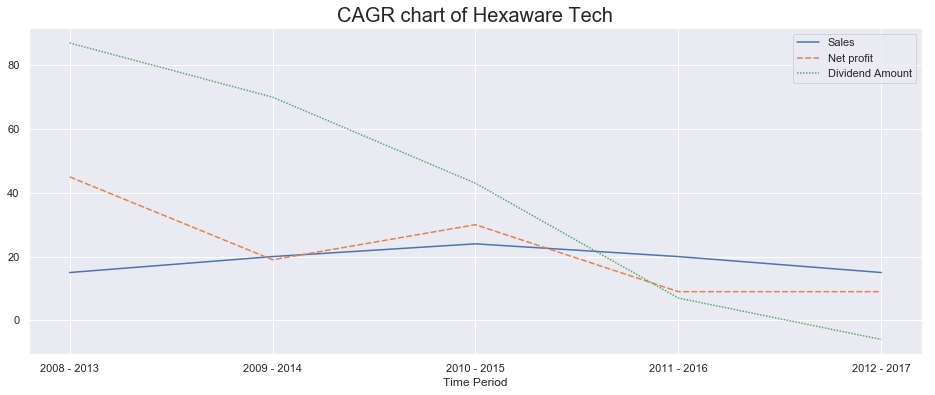

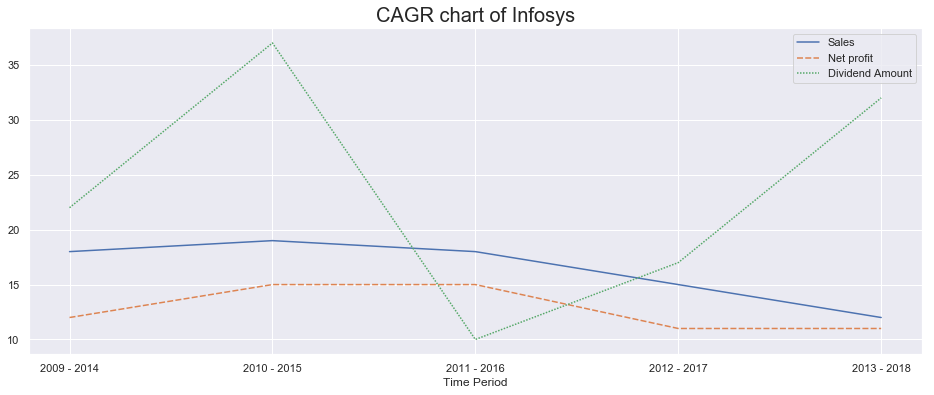

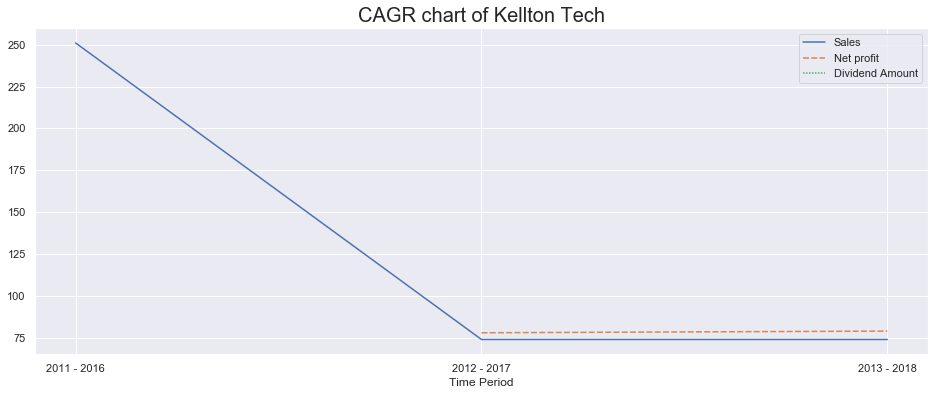

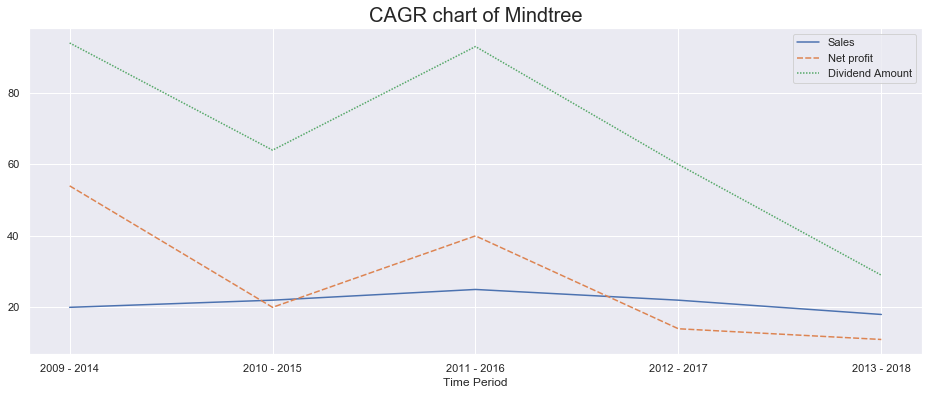

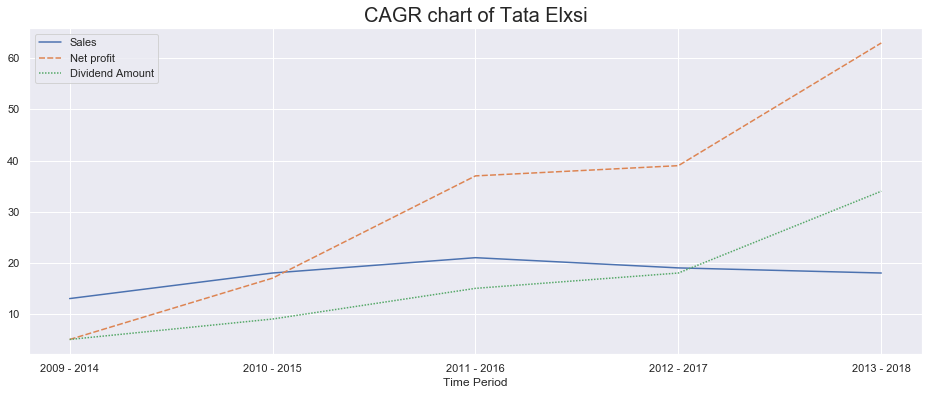

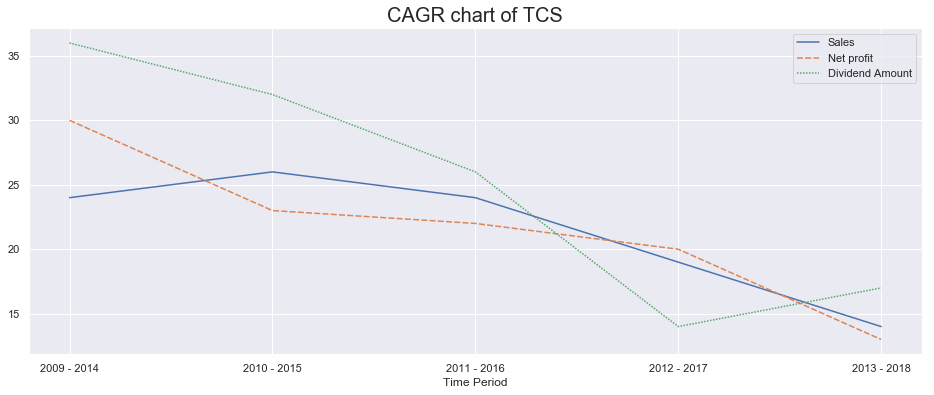

In [16]:
for company in FinData_df["Company"].unique():
    tempdf = FinData_df[FinData_df["Company"] == company]
    tempdf = tempdf.drop(columns=["Company"])
    ax = sns.lineplot(data=tempdf)
    ax.set_title('CAGR chart of ' + company, fontsize=20)
    plt.show()

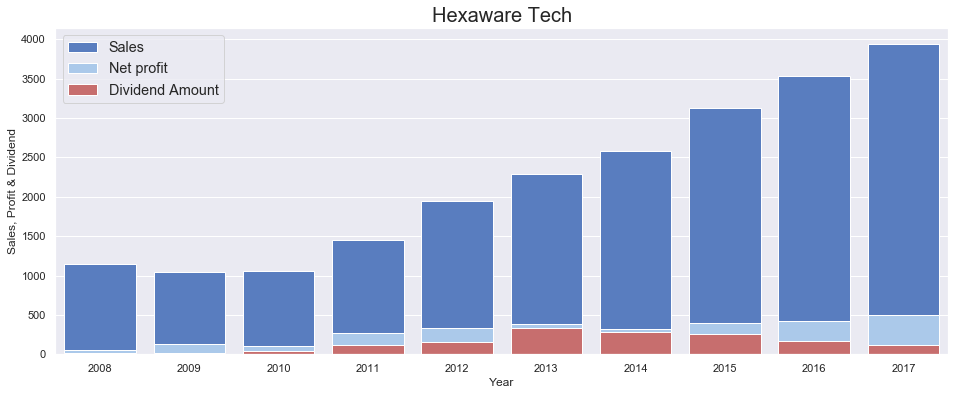

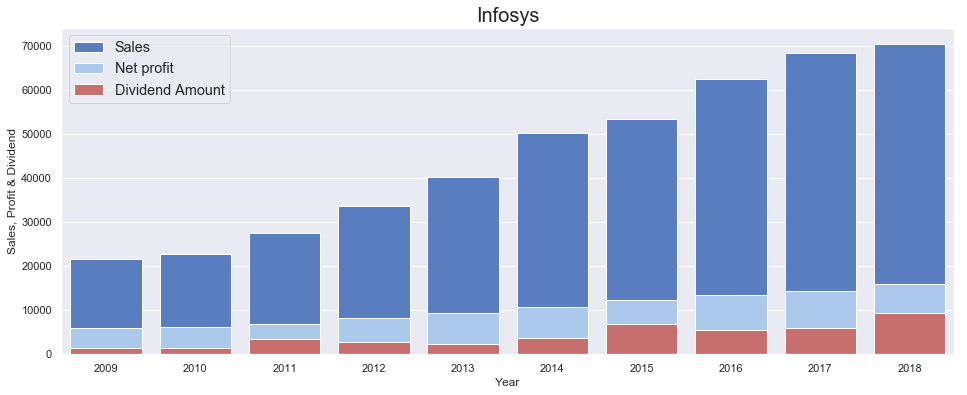

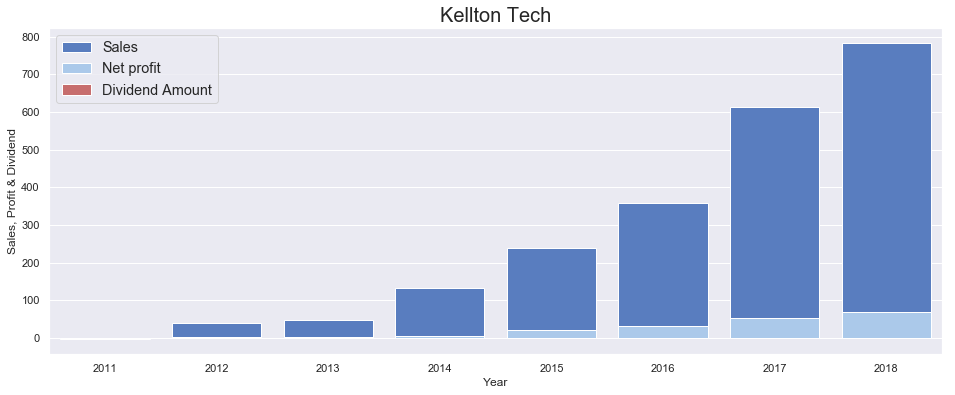

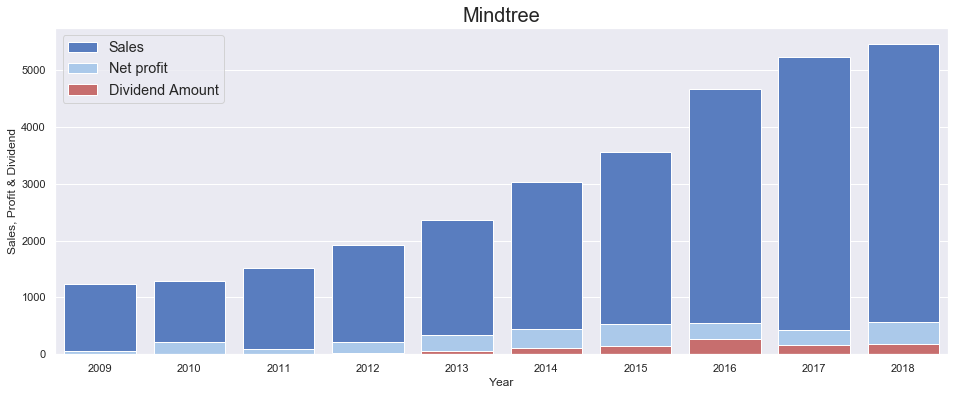

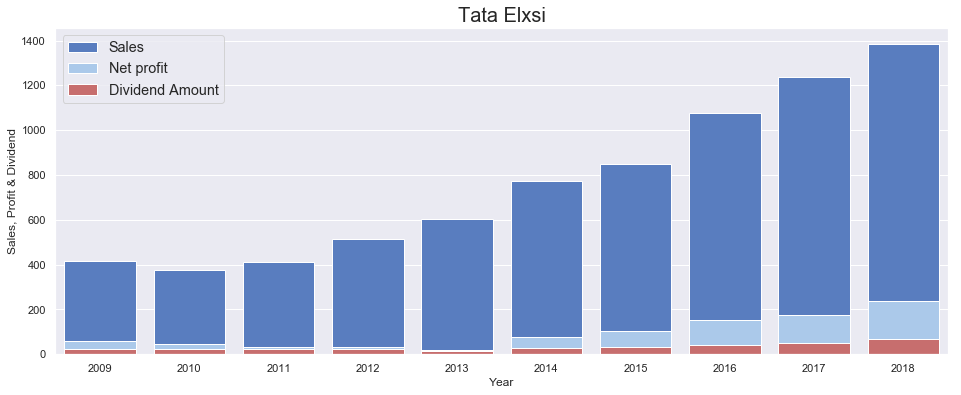

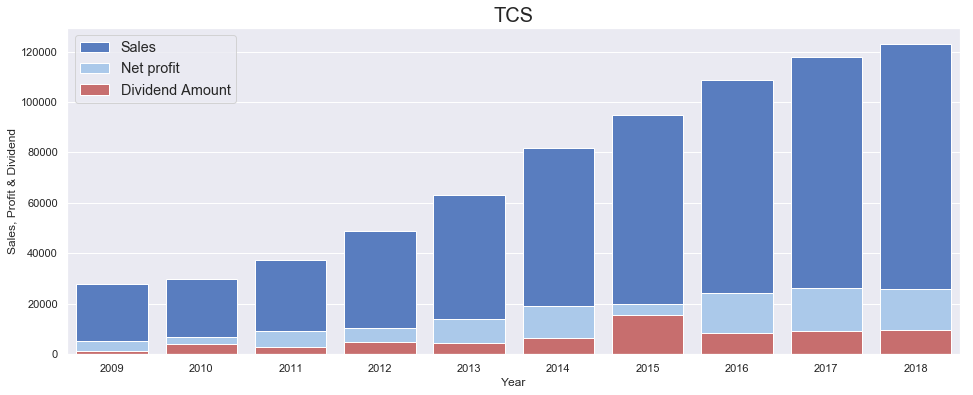

In [17]:
for company in merged_df["Company"].unique():
    tempdf = merged_df[merged_df["Company"] == company]
    tempdf = tempdf.drop(columns=["Company"])
    sns.set_color_codes("muted")
    ax = sns.barplot(y="Sales", data=tempdf, x ='Report Date', color="b", label="Sales")

    sns.set_color_codes("pastel")
    ax = sns.barplot(y="Net profit", data=tempdf, x ='Report Date', color="b", label="Net profit")

    sns.set_color_codes("muted")
    ax = sns.barplot(y="Dividend Amount", data=tempdf, x ='Report Date', color="r", label="Dividend Amount")

    ax.set_title(company, fontsize=20)

    plt.xlabel('Year')
    plt.ylabel('Sales, Profit & Dividend')

    plt.legend(loc='upper left', fontsize = 'large')
    plt.show()

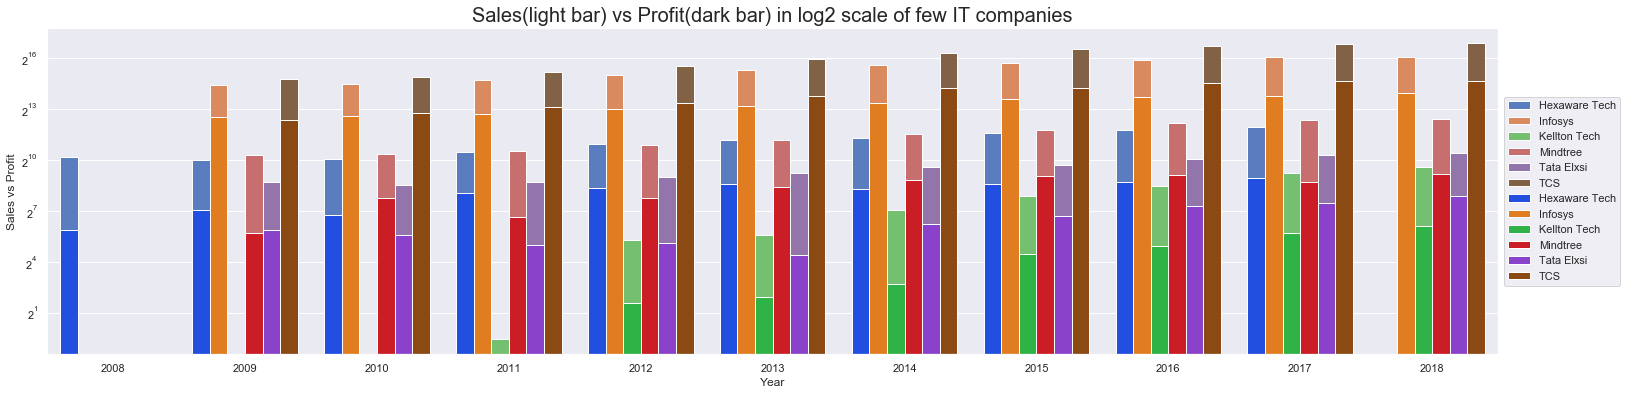

In [18]:
#sns.color_palette("hls", 8)
plt.rcParams['figure.figsize'] = [26, 6]
ax = sns.barplot(data=merged_df, x = 'Report Date', y="Sales", hue="Company", palette='muted')


#sns.set_color_codes("pastel")
ax = sns.barplot(data=merged_df, x = 'Report Date', y="Net profit", hue="Company", palette='bright')
ax.set_yscale('log', basey=2)
ax.set_title('Sales(light bar) vs Profit(dark bar) in log2 scale of few IT companies', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Sales vs Profit')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Analysis-chart.jpg', dpi=200 , bbox_inches='tight')